In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
df = pd.DataFrame({
    'x':[12,55,58,60,72,25,28,29,20,28,18,29,33,24,45,45,52,51,52,55,53,55,61,64,69,72],
    'y':[39,15,25,24,28,42,40,38,36,30,52,54,46,55,59,63,70,66,63,58,23,14,8,19,7,24]
})

In [26]:
df1 = df.copy(deep=True)

In [28]:
np.random.seed(200)
k = 3
# centroids[i] = [x,y]
centroids = {}
for i in range(k):
    x = np.random.randint(df.x.min(),df.x.max())
    y = np.random.randint(df.y.min(), df.y.max())
    centroids[i] = [x,y]
print(centroids)

{0: [38, 48], 1: [28, 11], 2: [54, 62]}


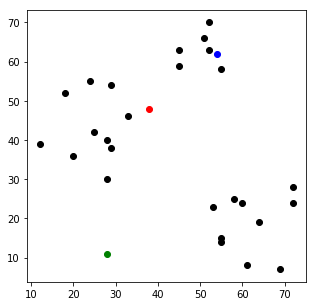

In [30]:
fig = plt.figure(figsize=(5,5))
plt.scatter(df.x,df.y,c='k')
colmap = {0:'r',1:'g',2:'b'}
for i in centroids.keys():
    plt.scatter(*centroids[i],color=colmap[i])
plt.show()

In [31]:
# Assignment stage
def assignment(df,centroids):
    
    for i in centroids.keys(): # calculating euclidian distance
        df[f'distance_from_{i}'] = np.sqrt(
        np.square(df.x - centroids[i][0]) + 
        np.square(df.y - centroids[i][1]))

    centroids_distance_cols = [f'distance_from_{i}' for i in centroids.keys()]
    
    df['closest'] = df[centroids_distance_cols].idxmin(axis=1)
    df['closest'] = df['closest'].map(lambda x: int(x[-1]))
    df['color']   = df['closest'].map(lambda x: colmap[x])
    
    return df

df = assignment(df,centroids)

In [32]:
df.head()

,x,y,distance_from_0,distance_from_1,distance_from_2,closest,color
0,12,39,27.513633,32.249031,47.885280,0,r
1,55,15,37.121422,27.294688,47.010637,1,g
2,58,25,30.479501,33.105891,37.215588,0,r
3,60,24,32.557641,34.539832,38.470768,0,r
4,72,28,39.446166,47.169906,38.470768,2,b


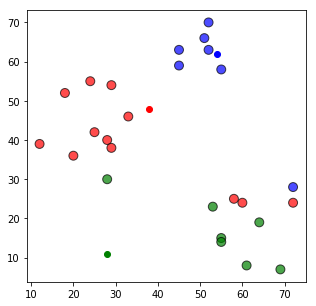

In [35]:
fig = plt.figure(figsize = (5,5))
plt.scatter(df.x,df.y,c=df.color,edgecolors='k',s=80,alpha=.7)
for i in centroids.keys():
    plt.scatter(*centroids[i],c=colmap[i])
plt.show()

In [36]:
# update stage
import copy

In [37]:
old_centroids = copy.deepcopy(centroids)

In [38]:
def update(centroids):
    
    for i in centroids.keys():
        centroids[i][0] = np.mean(df[df.closest == i].x)
        centroids[i][1] = np.mean(df[df.closest == i].y)
        
    return centroids

In [39]:
centroids = update(centroids)

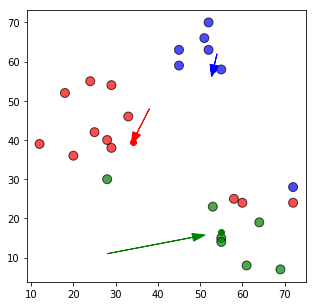

In [41]:
fig = plt.figure(figsize=(5,5))
ax = plt.axes()
plt.scatter(df.x,df.y,c=df.color,edgecolors='k',s=80,alpha=.7)
for i in centroids.keys():
    plt.scatter(*centroids[i],c=colmap[i])
    
for i in old_centroids.keys():
    oldx = old_centroids[i][0]
    oldy = old_centroids[i][1]
    dx = (centroids[i][0] - old_centroids[i][0]) * .75
    dy = (centroids[i][1] - old_centroids[i][1]) * .75
    ax.arrow(oldx,oldy,dx,dy,head_width=2,head_length=3
            ,fc=colmap[i],ec=colmap[i])
    
plt.show()

In [42]:
df = assignment(df,centroids)

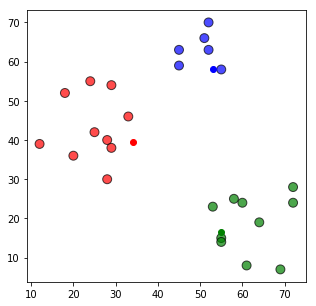

In [43]:
fig = plt.figure(figsize = (5,5))
plt.scatter(df.x,df.y,c=df.color,edgecolors='k',s=80,alpha=.7)
for i in centroids.keys():
    plt.scatter(*centroids[i],c=colmap[i])
plt.show()

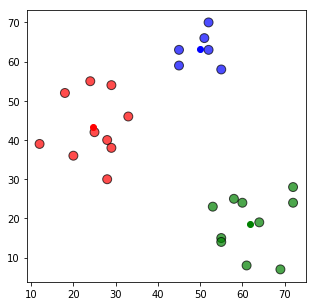

In [44]:
# continue until all assigned categories don't change any more
while True:
    closest_centroids = df.closest.copy(deep=True)
    centroids = update(centroids)
    df = assignment(df,centroids)
    if closest_centroids.equals(df.closest):
        break
    
fig = plt.figure(figsize = (5,5))
plt.scatter(df.x,df.y,c=df.color,edgecolors='k',s=80,alpha=.7)
for i in centroids.keys():
    plt.scatter(*centroids[i],c=colmap[i])
plt.show()

In [45]:
centroids

{0: [24.6, 43.2], 1: [61.9, 18.7], 2: [50.0, 63.166666666666664]}

In [50]:
from sklearn.cluster import KMeans

kmean = KMeans(n_clusters=3)
kmean.fit(df1)

labels = kmean.predict(df1)
centroids = kmean.cluster_centers_
centroids

array([[24.6       , 43.2       ],
       [61.9       , 18.7       ],
       [50.        , 63.16666667]])

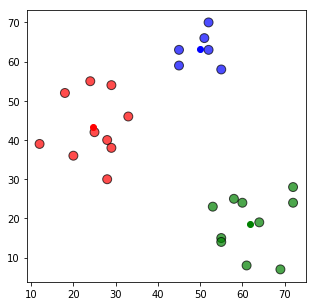

In [61]:
fig = plt.figure(figsize = (5,5))
colors = map(lambda x : colmap[x],labels)
color1 = list(colors)
plt.scatter(df.x,df.y,c=color1,edgecolors='k',s=80,alpha=.7)
for i,cent in enumerate(centroids):
    plt.scatter(*cent,c=colmap[i])
plt.show()

## very sensitive towards scalling so for best practice first normalize your data